<center><h1>Artists Exploratory Data Analysis</h1></center>

In this notebook, an exploratory data analysis (EDA) is performed for a dataset of artists. The goal of the EDA is to examine and visualize data to obtain information about the distribution, descriptive statistics, outliers, and relationships between variables. The analysis is divided into the following sections:

- Data exploration
- Univariate analysis
- Bivariate analysis

In [150]:
# Import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Read data
url = "https://drive.google.com/file/d/1frEhHHnMbib-f56jSNu_aDjxKRqtAcuZ/view?usp=share_link"
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
artists_df = pd.read_csv(dwn_url)

# Data Exploration

In [17]:
# Check dimensions
artists_df.shape

(1162095, 5)

In [15]:
# Check columns and data types
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162095 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB


In [20]:
# Check the first 10 registries
artists_df.head(10)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
5,0DotfDlYMGqkbzfBhcA5r6,7.0,[],Astral Affect,0
6,0DqP3bOCiC48L8SM9gK4W8,1.0,[],Yung Seed,0
7,0Drs3maQb99iRglyTuxizI,0.0,[],Wi'Ma,0
8,0DsPeAi1gxPPnYjgpiEGSR,0.0,[],lentboy,0
9,0DtvnTxgZ9K5YaPS5jdlQW,20.0,[],addworks,0


In [27]:
# Check missing values
artists_df.isnull().sum()

id             0
followers     11
genres         0
name           0
popularity     0
dtype: int64

In [30]:
# Check duplicate rows
artists_df.duplicated().sum()

0

In [32]:
# Check duplicates in the "name" column 
artists_df.duplicated(subset=["name"]).sum()

27665

In [33]:
# Check duplicates based on both the "genres" and "name" columns
artists_df.duplicated(subset=["genres","name"]).sum()

14881

# Univariate Analysis

## Quantitative Variables

### Non-Graphic Analysis

In [34]:
# Statistical summary
artists_df.describe()

,followers,popularity
count,1.162084e+06,1.162095e+06
mean,1.022070e+04,8.795961e+00
std,2.543995e+05,1.355777e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.700000e+01,2.000000e+00
75%,4.170000e+02,1.300000e+01
max,7.890023e+07,1.000000e+02


In [40]:
# Check outliers
def count_outliers(df, col):
    """
    Returns the number of outliers in a column of a DataFrame using the Tukey's method.
    
    Parameters:
    -----------
    df (pandas.DataFrame): Input DataFrame.
    col (str): Name of the column to be analyzed.
        
    Returns:
    --------
    count (int): Number of outliers in the specified column.
        
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    count = ((df[col] > upper_bound) | (df[col] < lower_bound)).sum()
    
    return count


In [41]:
print("Number of outliers in the followers column:", count_outliers(artists_df, "followers"))
print("Number of outliers in the popularity column:", count_outliers(artists_df, "popularity"))

Number of outliers in the followers column: 197166
Number of outliers in the popularity column: 95238


### Graphic Analysis

In [57]:
# Histogram
def plot_histogram(df, col):
    """
    Generates a histogram of a specified column in a given DataFrame.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the data.
    col (str): Name of the column to generate the histogram.
    
    Returns:
    None. The function displays the histogram plot.
    """
    plt.hist(df[col], bins=20, alpha=0.5)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

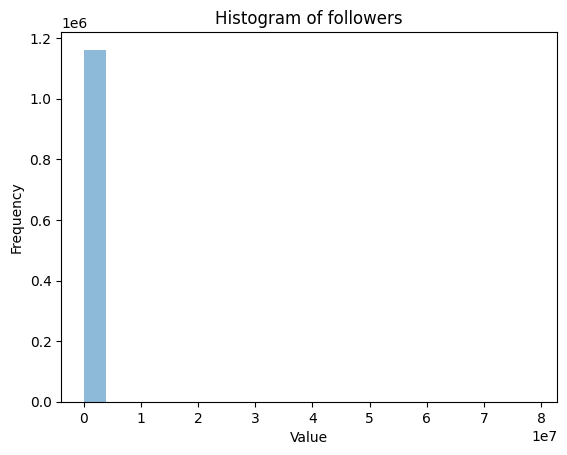

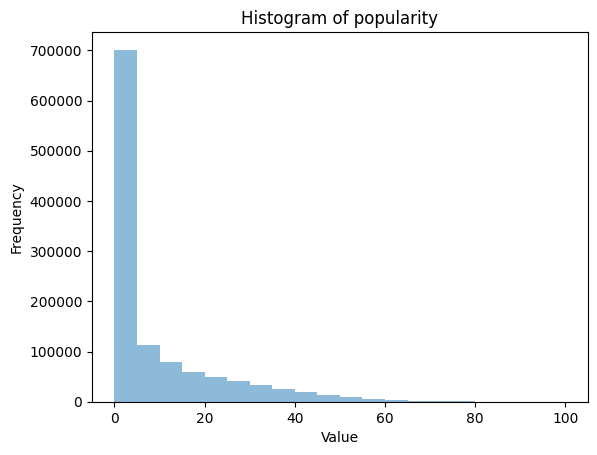

In [58]:
plot_histogram(artists_df, "followers")
plot_histogram(artists_df, "popularity")

In [153]:
# Boxplot
def plot_boxplot(df, col):
    '''
    Creates a boxplot of a numeric variable in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    col (str): The name of the column in the DataFrame to be plotted.

    Returns:
    None
    '''
    plt.figure(figsize=(8,6))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

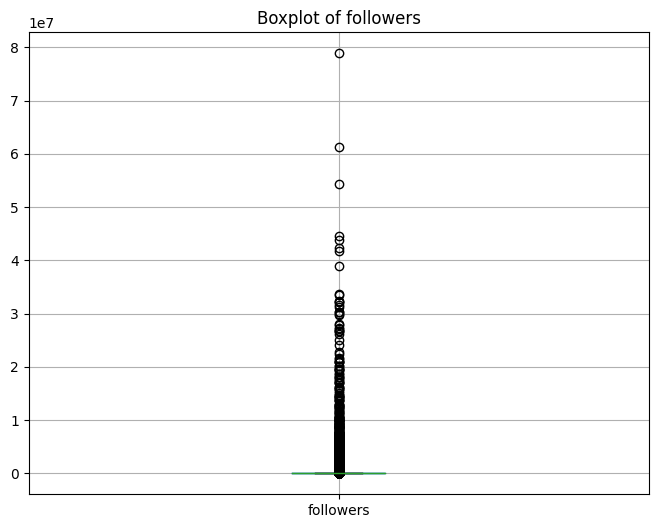

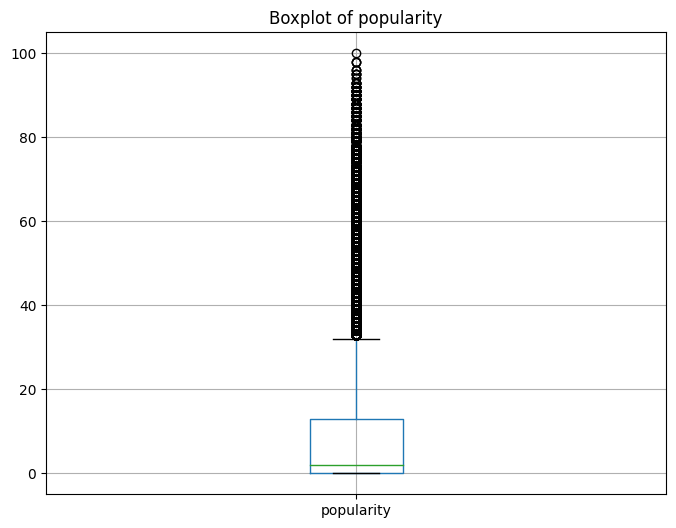

In [154]:
plot_boxplot(artists_df, "followers")
plot_boxplot(artists_df, "popularity")

## Qualitative Variables

### Non-Graphic Analysis

In [29]:
# Statistical summary 
artists_df.describe(include='object')

,id,genres,name
count,1162095,1162095,1162095
unique,1162095,49155,1134430
top,0DheY5irMjBUeLybbCUEZ2,[],Ace
freq,1,856500,13


In [59]:
# Frequency table
def freq_table(df, col):
    """
    Generate a frequency table for a categorical variable in a pandas DataFrame.

    Parameters:
    df (pandas DataFrame): The DataFrame containing the variable of interest.
    col (str): The name of the column containing the variable of interest.

    Returns:
    pandas DataFrame: A frequency table containing the counts and percentages of each category.
    """

    # Count the number of occurrences of each category
    counts = df[col].value_counts()

    # Calculate the percentage of each category
    percentages = counts / len(df) * 100

    # Create a new DataFrame with the counts and percentages
    freq_table = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])

    # Rename the index to the variable name
    freq_table.index.name = col

    return freq_table


In [61]:
print(freq_table(artists_df, "genres"))
print(freq_table(artists_df, "name"))

                                                     Count  Percentage
genres                                                                
[]                                                  856500   73.703097
['background piano']                                   307    0.026418
['calming instrumental']                               256    0.022029
['background music']                                   247    0.021255
['russelater']                                         226    0.019448
...                                                    ...         ...
['christian hip hop', 'christian pop', 'christi...       1    0.000086
['edm', 'moldovan pop', 'pop dance', 'progressi...       1    0.000086
['comic', 'modern ska punk', 'punk', 'ska', 'sk...       1    0.000086
['dirty south rap', 'g funk', 'gangster rap', '...       1    0.000086
['clean comedy', 'deep comedy', 'new comedy']            1    0.000086

[49155 rows x 2 columns]
                       Count  Percentage
name      

### Graphic Analysis

In [88]:
# Bar chart
def bar_chart(df, col, top_n=10):
    """
    Creates a bar chart for a categorical variable in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    col (str): The name of the column containing the categorical variable.
    top_n (int): The number of top categories to plot (default 10).

    Returns:
    None (displays a plot).
    """
    # Get value counts for the column and select the top N categories
    counts = df[col].value_counts().nlargest(top_n)

    # Plot the bar chart
    plt.figure(figsize=(10,6))
    plt.bar(counts.index, counts.values)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

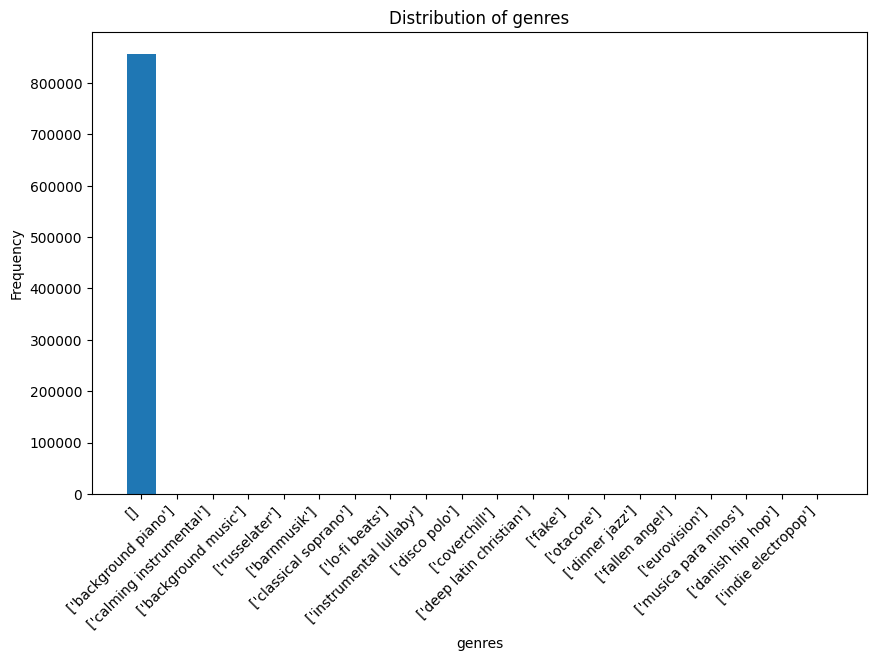

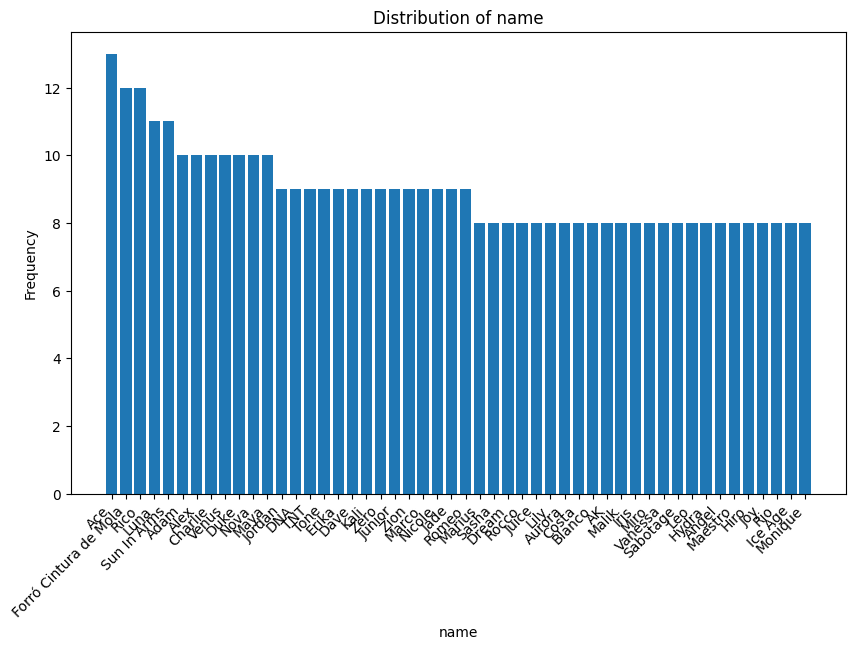

In [89]:
bar_chart(artists_df,"genres", 20)
bar_chart(artists_df,"name", 50)

In [94]:
# Pie Chart
def pie_chart(df, col, top_n=10):
    """
    Creates a pie chart with the most frequent categories.

    Parameters:
    df (pandas.DataFrame): The data to use for creating the pie chart.
    col (str): The name of the categorical column to use for creating the pie chart.
    top_n (int): The number of most frequent categories to include in the chart (default 10).

    Returns:
    None (displays a plot)

    """
    # Get value counts for column
    counts = df[col].value_counts()

    # Get the most frequent categories
    most_frequent = counts.nlargest(top_n)

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(most_frequent, labels=most_frequent.index, autopct='%1.1f%%')
    plt.title(f"Pie chart of {col} with the most frequent categories", fontsize=16)
    plt.show()

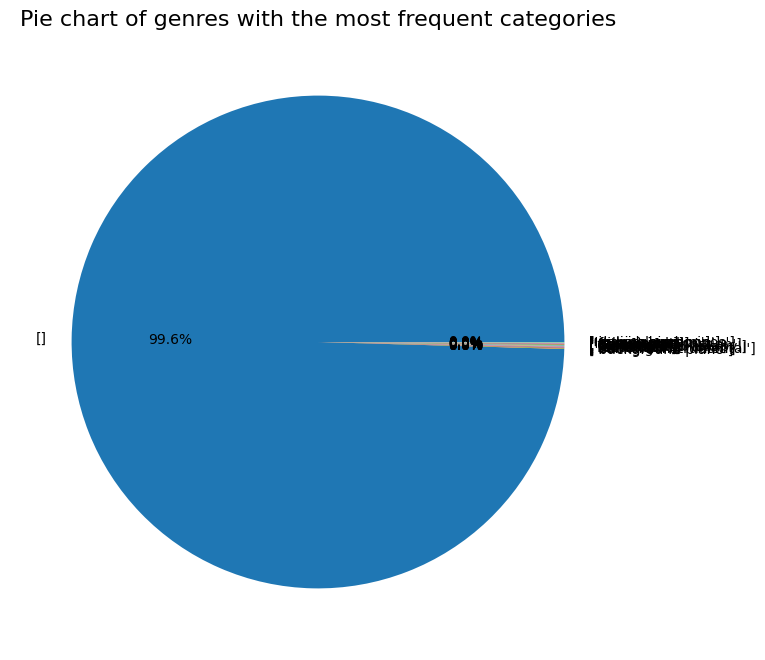

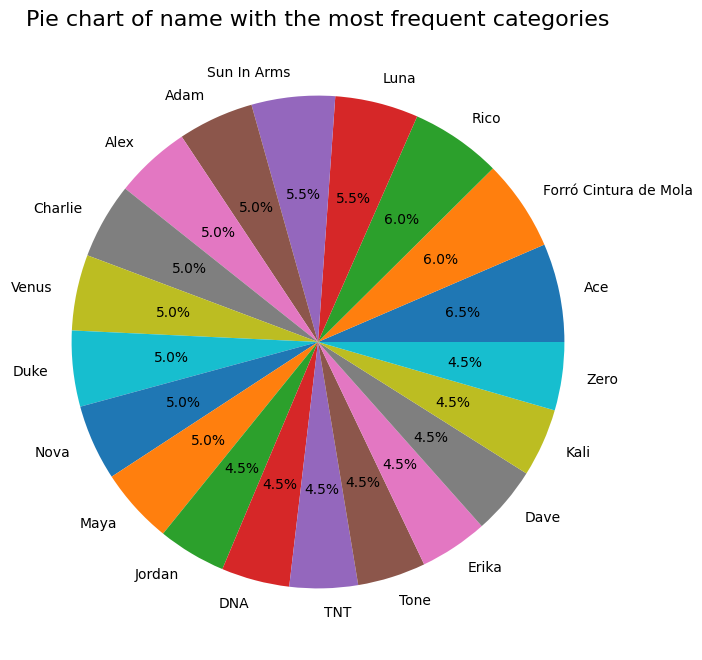

In [96]:
pie_chart(artists_df,"genres", 20)
pie_chart(artists_df,"name", 20)

# Bivariate Analysis

### Non-Graphic Analysis

In [102]:
# Correlation matrix
artists_df.corr(numeric_only=True)


,followers,popularity
followers,1.000000,0.171101
popularity,0.171101,1.000000


In [116]:
# Cross table
def crosstab_top_n(df, col1, col2, n=10):
    """
    Creates a cross tabulation (crosstab) of the top n most frequent categories in col1 and col2.

    Parameters:
    data (pandas.DataFrame): The data to use for creating the crosstab.
    col1 (str): The name of the first categorical column to use for creating the crosstab.
    col2 (str): The name of the second categorical column to use for creating the crosstab.
    n (int): The number of most frequent categories to include in the crosstab (Default 10).

    Returns:
    pandas.DataFrame: The crosstab of the top n most frequent categories in col1 and col2.
    """

    # Get the top n categories for col1 and col2
    top_n_col1 = df[col1].value_counts().nlargest(n).index
    top_n_col2 = df[col2].value_counts().nlargest(n).index

    # Filter the data to include only the top n categories
    data_top_n = df[df[col1].isin(top_n_col1) & df[col2].isin(top_n_col2)]

    # Create the crosstab of the top n categories
    crosstab = pd.crosstab(data_top_n[col1], data_top_n[col2])

    return crosstab

In [146]:
crosstab_top_n(artists_df, "genres", "name",10)

name,Ace,Adam,Alex,Charlie,Duke,Forró Cintura de Mola,Luna,Rico,Sun In Arms,Venus
genres,,,,,,,,,,
[],8,8,9,9,10,11,5,9,11,8


### Graphic Analysis

array([[<AxesSubplot: xlabel='followers', ylabel='followers'>,
        <AxesSubplot: xlabel='popularity', ylabel='followers'>],
       [<AxesSubplot: xlabel='followers', ylabel='popularity'>,
        <AxesSubplot: xlabel='popularity', ylabel='popularity'>]],
      dtype=object)

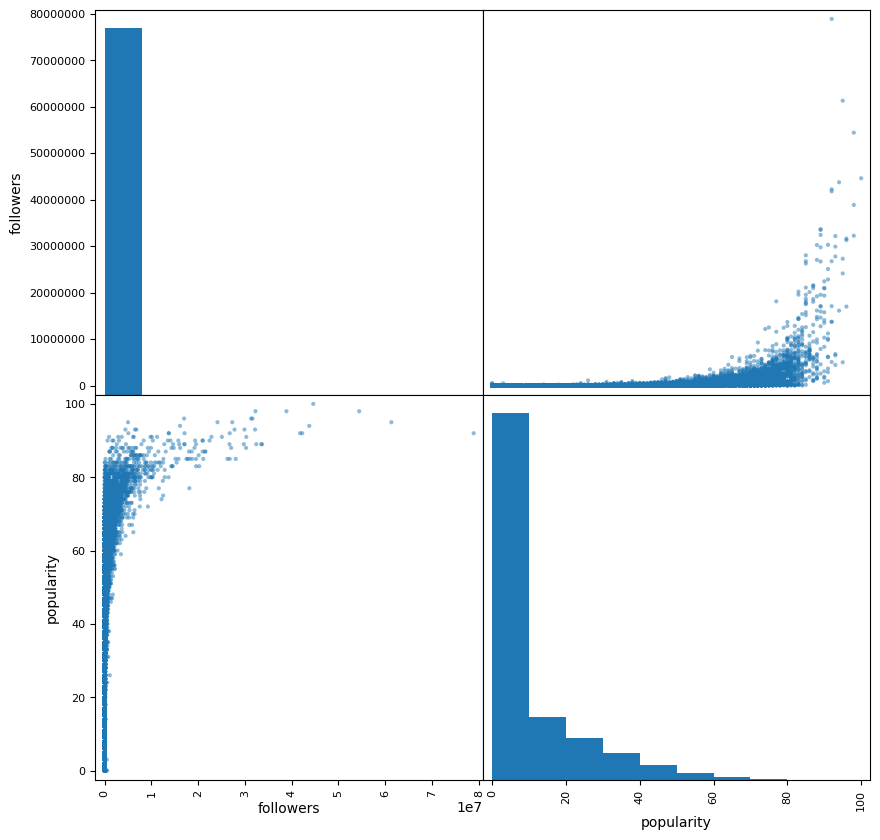

In [97]:
# Scatter plot matrix for all numerical variables
pd.plotting.scatter_matrix(artists_df, figsize=(10,10))

In [163]:
# Boxplot 
def boxplot(df, x_col, y_col):
    '''
    Creates a boxplot of a numerical variable y_col for each category in a categorical variable x_col.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to plot.
    x_col (str): The name of the column containing the categorical variable to group the data by.
    y_col (str): The name of the column containing the numerical variable to plot.
    
    Returns:
    None.
    '''
    sns.boxplot(x=x_col, y=y_col, data=df)
    plt.title('Boxplot of ' + y_col + ' by ' + x_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.xticks(rotation=45)
    plt.show()

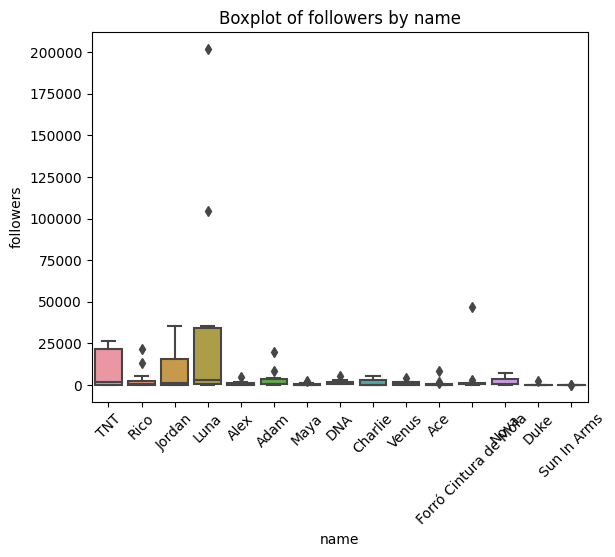

In [165]:
#  Boxplot for the followers column, grouped by the name column, but only for the top 15 most frequent values in the name column.
boxplot(artists_df[artists_df["name"].isin(artists_df["name"].value_counts().nlargest(15).index.tolist())],"name", "followers")

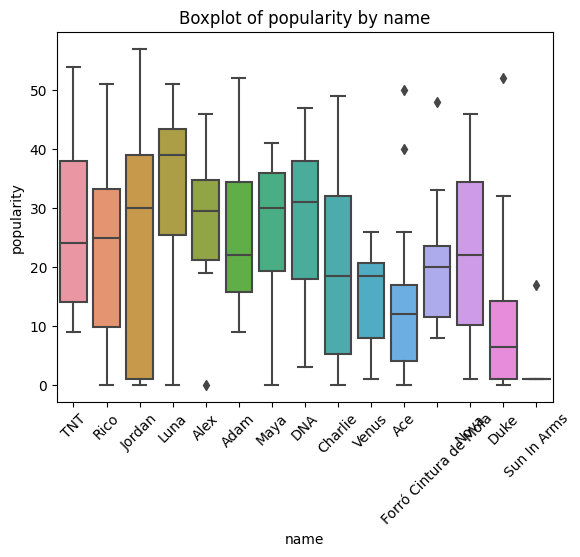

In [166]:
#  Boxplot for the popularity column, grouped by the name column, but only for the top 15 most frequent values in the name column.
boxplot(artists_df[artists_df["name"].isin(artists_df["name"].value_counts().nlargest(15).index.tolist())],"name", "popularity")